In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,526 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df9 = pd.read_excel('/content/drive/MyDrive/DATATHON/TOSS8.xlsx')

In [14]:
df9.shape

(342, 41)

In [15]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FA년도      342 non-null    int64  
 1   구단명       342 non-null    object 
 2   선수명       342 non-null    object 
 3   세부 포지션    342 non-null    object 
 4   인정년수      342 non-null    int64  
 5   구분        342 non-null    object 
 6   FA등급      342 non-null    object 
 7   플레이년도     342 non-null    int64  
 8   Age       342 non-null    int64  
 9   G         342 non-null    int64  
 10  GS        342 non-null    int64  
 11  GR        342 non-null    int64  
 12  W         342 non-null    int64  
 13  L         342 non-null    int64  
 14  S         342 non-null    int64  
 15  BLSV      342 non-null    int64  
 16  HD        342 non-null    int64  
 17  BLHD      342 non-null    int64  
 18  IP        342 non-null    float64
 19  ER        342 non-null    int64  
 20  H         342 non-null    int64 

In [16]:
df9.isnull().sum()

,0
FA년도,0
구단명,0
선수명,0
세부 포지션,0
인정년수,0
구분,0
FA등급,0
플레이년도,0
Age,0
G,0


In [7]:
import pandas as pd

# 선수명 6개 이상 등장한 선수 필터링
player= df9['선수명'].value_counts()
players = player[player >= 6].index
df9_f = df9[df9['선수명'].isin(players)]

#  잔류 여부 잔류 또는 이적 남기기
df9_f2 = df9_f[df9_f['잔류 여부'].isin(['잔류', '이적'])]

df9_f2_sorted = df9_f2.sort_values(by=['선수명', 'FA년도'])

#  FA 계약 총액 차이와 WAR 차이를 계산
df9_f2_sorted['FA 계약 총액 차이'] = df9_f2_sorted.groupby('선수명')['FA 계약 총액'].diff()
df9_f2_sorted['WAR 차이'] = df9_f2_sorted.groupby('선수명')['종합 WAR'].diff()

print(df9_f2_sorted[['선수명', 'FA년도', 'WAR 차이', 'FA 계약 총액 차이', '잔류 여부']])

     선수명  FA년도  WAR 차이  FA 계약 총액 차이 잔류 여부
85   박정진  2014     NaN          NaN    잔류
109  손승락  2016     NaN          NaN    이적
123  송은범  2015     NaN          NaN    이적
119  송은범  2020    0.00        -24.0    잔류
147  양현종  2017     NaN          NaN    잔류
152  오승환  2024     NaN          NaN    잔류
171  우규민  2017     NaN          NaN    이적
167  우규민  2021   -1.63        -55.0    잔류
210  윤성환  2015     NaN          NaN    잔류
206  윤성환  2019   -3.95        -70.0    잔류
289  정우람  2016     NaN          NaN    이적
285  정우람  2020    0.67        -45.0    잔류
318  차우찬  2017     NaN          NaN    이적
314  차우찬  2021   -3.20        -75.0    잔류


In [8]:
a = df9_f2_sorted.dropna(how='any', axis=0)
print(a)

     FA년도 구단명  선수명 세부 포지션  인정년수   구분 FA등급  플레이년도  Age   G  ...  구원 WAR  \
119  2020  LG  송은범     RP     4  재자격    A   2019   35  63  ...    0.48   
167  2021  삼성  우규민     RP     4  재자격    B   2020   35  52  ...    0.50   
206  2019  삼성  윤성환     SP     4  재자격    A   2018   37  24  ...    0.48   
285  2020  한화  정우람     CP     4  재자격    A   2019   34  57  ...    2.82   
314  2021  LG  차우찬     SP     4  재자격    B   2020   33  13  ...    0.48   

     종합 WAR      연봉  비고1  비고2  잔류 여부  FA 계약 연수  FA 계약 총액  FA 계약 총액 차이  WAR 차이  
119    1.30   25000   고졸    0     잔류         2      10.0        -24.0    0.00  
167    0.50   70000   고졸    0     잔류         2      10.0        -55.0   -1.63  
206    0.80   80000   고졸    0     잔류         1      10.0        -70.0   -3.95  
285    2.82   80000   고졸    0     잔류         4      39.0        -45.0    0.67  
314    0.56  100000   고졸    0     잔류         2      20.0        -75.0   -3.20  

[5 rows x 43 columns]


In [9]:
import statsmodels.api as sm

X = a[['FA 계약 총액 차이']]
y = a['WAR 차이']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print("t-values:")
print(model.tvalues)

print("\np-values:")
print(model.pvalues)


t-values:
const          1.744969
FA 계약 총액 차이    2.890927
dtype: float64

p-values:
const          0.179334
FA 계약 총액 차이    0.062965
dtype: float64


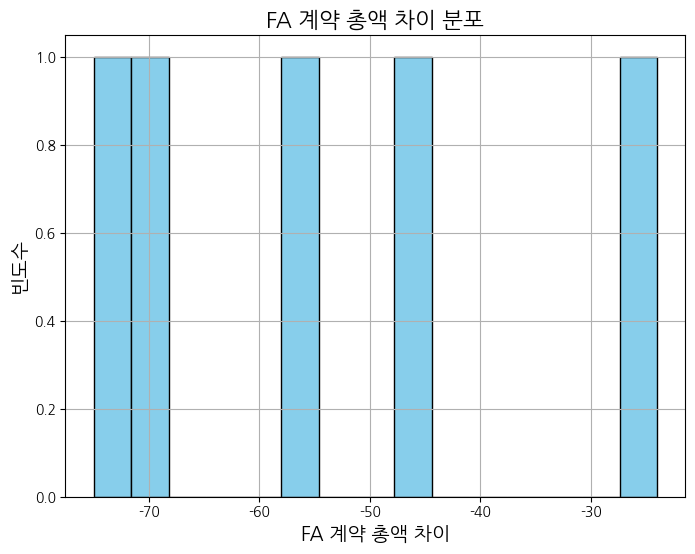

In [25]:
#fa금액 차이 데이터 수 보다 bins 값이 더 높음
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(a['FA 계약 총액 차이'], bins=15, color='skyblue', edgecolor='black')
plt.title('FA 계약 총액 차이 분포', fontsize=16)
plt.xlabel('FA 계약 총액 차이', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(True)
plt.show()

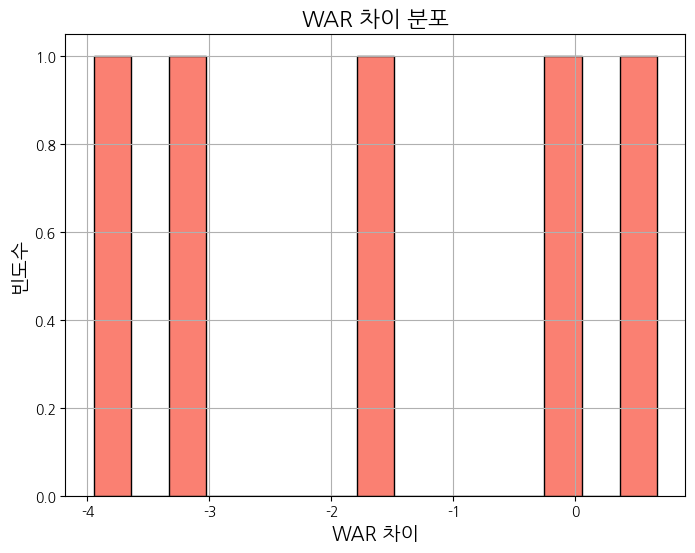

In [13]:
#WAR 차이
plt.figure(figsize=(8,6))
plt.hist(a['WAR 차이'], bins=15, color='salmon', edgecolor='black')
plt.title('WAR 차이 분포', fontsize=16)
plt.xlabel('WAR 차이', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(True)
plt.show()

In [17]:
df11 = pd.read_excel('/content/drive/MyDrive/DATATHON/YASS1111.xlsx')

In [18]:
df11.shape

(650, 35)

In [19]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FA년도        650 non-null    int64  
 1   구단명         650 non-null    object 
 2   선수명         650 non-null    object 
 3   포지션         650 non-null    object 
 4   인정년수        650 non-null    int64  
 5   구분          650 non-null    object 
 6   FA등급        650 non-null    object 
 7   플레이년도       650 non-null    int64  
 8   Age         650 non-null    int64  
 9   G           650 non-null    int64  
 10  PA          650 non-null    int64  
 11  AB          650 non-null    float64
 12  R           650 non-null    int64  
 13  H           650 non-null    int64  
 14  2B          650 non-null    int64  
 15  3B          650 non-null    int64  
 16  HP          650 non-null    int64  
 17  HR          650 non-null    int64  
 18  RBI         650 non-null    int64  
 19  SB          650 non-null    i

In [20]:
df11.isnull().sum()

,0
FA년도,0
구단명,0
선수명,0
포지션,0
인정년수,0
구분,0
FA등급,0
플레이년도,0
Age,0
G,0


In [26]:
import pandas as pd

# 1. 선수명 6개 이상 등장한 선수 필터링
player_c = df11['선수명'].value_counts()
players_w = player_c[player_c >= 6].index
df11_f = df11[df11['선수명'].isin(players_w)]

# 2. 잔류 여부가 '잔류' 또는 '이적'으로 지정된 데이터만 남기기
df11_f2 = df11_f[df11_f['잔류 여부'].isin(['잔류', '이적'])]

df11_f2_sorted = df11_f2.sort_values(by=['선수명', 'FA년도'])

df11_f2_sorted['종합 WAR'] = (
    df11_f2_sorted['oWAR'] + df11_f2_sorted['dWAR']
)

# 4. FA 계약 총액 차이와 WAR 차이를 계산
df11_f2_sorted['FA 계약 총액 차이'] = df11_f2_sorted.groupby('선수명')['FA 계약 총액'].diff()
df11_f2_sorted['WAR 차이'] = df11_f2_sorted.groupby('선수명')['종합 WAR'].diff()

print(df11_f2_sorted[['선수명', 'FA년도', 'WAR 차이', 'FA 계약 총액 차이', '잔류 여부']])

     선수명  FA년도  WAR 차이  FA 계약 총액 차이 잔류 여부
3    강민호  2014     NaN          NaN    잔류
7    강민호  2018   0.060         5.00    이적
11   강민호  2022   0.320       -44.00    잔류
41   김강민  2015     NaN          NaN    잔류
45   김강민  2020  -1.125       -46.00    잔류
..   ...   ...     ...          ...   ...
605  최준석  2018  -1.100       -34.45    이적
615  최형우  2017     NaN          NaN    이적
619  최형우  2021  -1.160       -53.00    잔류
644  황재균  2017     NaN          NaN    이적
648  황재균  2022  -2.080       -28.00    잔류

[67 rows x 5 columns]


In [27]:
a11 = df11_f2_sorted.dropna(how='any', axis=0)
print(a11)

     FA년도  구단명  선수명 포지션  인정년수    구분 FA등급  플레이년도  Age    G  ...  oWAR   dWAR  \
7    2018   롯데  강민호   C     4   재자격    A   2017   32  130  ...  3.43  0.190   
11   2022   삼성  강민호   C     4   재자격    C   2021   36  123  ...  3.91  0.030   
45   2020   SK  김강민  CF     4   재자격    A   2019   37  127  ...  1.06  0.530   
59   2024   LG  김민성  2B     4   재자격    B   2023   35  112  ...  1.14  0.480   
73   2023   삼성  김상수  SS     4   재자격    B   2022   32   72  ...  0.38  0.265   
87   2024  KIA  김선빈  2B     4   재자격    B   2023   34  119  ...  2.83  0.265   
111  2021   두산  김재호  SS     4   재자격    B   2020   35  120  ...  2.07  0.265   
126  2018  KIA  김주찬  1B     4   재자격    A   2017   36  122  ...  2.13  0.430   
140  2020   한화  김태균  DH     4   재자격    A   2019   37  127  ...  1.58  0.265   
149  2022   LG  김현수  LF     4  자격유지    B   2021   33  140  ...  3.53  0.265   
198  2019   KT  박경수  2B     4   재자격    A   2018   34  135  ...  2.63  0.265   
227  2020   NC  박석민  3B     4   재자격    A   2019   34

In [28]:
import statsmodels.api as sm


X = a11[['FA 계약 총액 차이']]
y = a11['WAR 차이']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WAR 차이   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     11.87
Date:                Fri, 09 May 2025   Prob (F-statistic):            0.00161
Time:                        01:16:23   Log-Likelihood:                -56.997
No. Observations:                  34   AIC:                             118.0
Df Residuals:                      32   BIC:                             121.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5013      0.261     -1.920      

In [29]:
import statsmodels.api as sm

X = a11[['FA 계약 총액 차이']]
y = a11['WAR 차이']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print("t-values:")
print(model.tvalues)

print("\np-values:")
print(model.pvalues)


t-values:
const         -1.920194
FA 계약 총액 차이    3.445701
dtype: float64

p-values:
const          0.063784
FA 계약 총액 차이    0.001612
dtype: float64


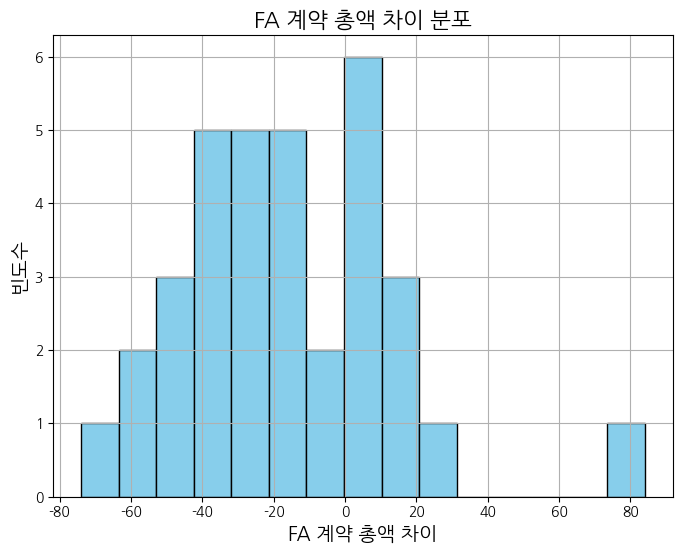

In [30]:
#fa금액 차이
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(a11['FA 계약 총액 차이'], bins=15, color='skyblue', edgecolor='black')
plt.title('FA 계약 총액 차이 분포', fontsize=16)
plt.xlabel('FA 계약 총액 차이', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(True)
plt.show()

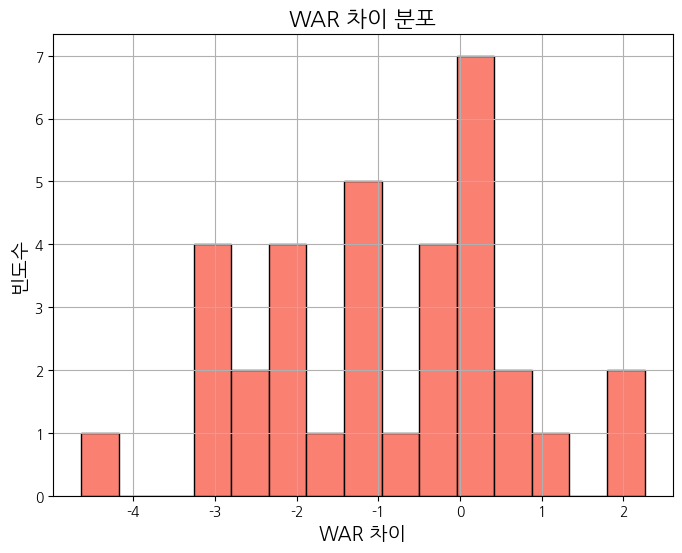

In [31]:
plt.figure(figsize=(8,6))
plt.hist(a11['WAR 차이'], bins=15, color='salmon', edgecolor='black')
plt.title('WAR 차이 분포', fontsize=16)
plt.xlabel('WAR 차이', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(True)
plt.show()